In [4]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Energy Model

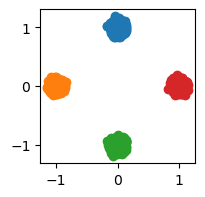

In [5]:
import sys
sys.path.append("/Users/tiejean/Documents/Education/Implementations/mlHlpers")

from modules.mlp import MLP
from modules.energy_model import EnergyModel
from utils.data import sample_circular_gmm

data, data_info = sample_circular_gmm(5000, num_modes=4, viz=True)

batch_size = 1000
input_dim = 2
output_dim = 1
mlp = MLP([input_dim, 64, output_dim])
energy_model = EnergyModel(mlp, input_dim)

optimizer = optim.Adam(energy_model.parameters(), lr=1e-3)

energy_model.train(data, optimizer, batch_size, n_iter=1000)


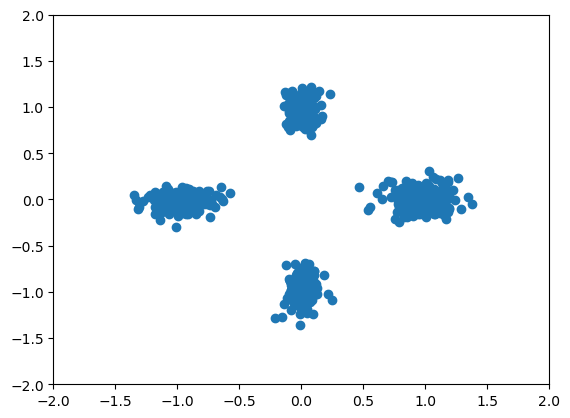

In [6]:
x0 = torch.randn((1000,2))
xx = energy_model.langevin_sampler(x0,  n_steps=1000, step_size=0.001)
plt.figure()
plt.scatter(xx[:,0], xx[:,1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()